<h1><center><font size = 9>Assignment 4</font></center></h1>
<h1><center><font size = 5>Zach Chase</font></center></h1>

In [314]:
import pandas as pd
import random
import numpy as np
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from statistics import multimode
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.pipeline import Pipeline
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)

# Question 1
## Part a
Read the data provided on canvas into Python. Print the first 5 rows of each dataset to inspect the nature of data

In [52]:
delivery_train = pd.read_csv("delivery_time_train_data.csv")
delivery_test = pd.read_csv("delivery_time_test_data.csv")
student_train = pd.read_csv("student_train_data.csv")
student_test = pd.read_csv("student_test_data.csv")

In [53]:
print(delivery_train.head())
print(delivery_train.dtypes)
print(delivery_train.describe())

   Miles  Deliveries  Time
0    100           4   9.3
1     50           3   4.8
2    100           4   8.9
3    100           2   6.5
4     50           2   4.2
Miles           int64
Deliveries      int64
Time          float64
dtype: object
            Miles  Deliveries        Time
count  199.000000  199.000000  199.000000
mean    70.075377    3.472362    7.166834
std     20.153937    1.601133    1.840785
min     40.000000    1.000000    2.800000
25%     50.000000    2.000000    5.900000
50%     75.000000    3.000000    7.100000
75%     87.500000    5.000000    8.600000
max    100.000000    6.000000   12.200000


In [54]:
print(delivery_test.head())
print(delivery_test.dtypes)
print(delivery_test.describe())

   Miles  Deliveries  Time
0     50           3   4.6
1     65           2   5.5
2     80           1   6.3
3     70           1   6.2
4     70           5   8.5
Miles           int64
Deliveries      int64
Time          float64
dtype: object
            Miles  Deliveries        Time
count  101.000000  101.000000  101.000000
mean    71.980198    3.514851    7.514851
std     18.358638    1.682937    2.100161
min     40.000000    1.000000    3.100000
25%     60.000000    2.000000    5.800000
50%     70.000000    3.000000    7.600000
75%     90.000000    5.000000    8.900000
max    100.000000    6.000000   12.300000


In [55]:
print(student_train.head())
print(student_train.dtypes)
print(student_train.describe())

    GPA  Age  Dropped
0  3.78   21        0
1  2.38   27        0
2  3.05   21        1
3  2.19   28        1
4  3.22   23        0
GPA        float64
Age          int64
Dropped      int64
dtype: object
              GPA         Age     Dropped
count  400.000000  400.000000  400.000000
mean     2.850200   24.855000    0.287500
std      0.434538    3.135051    0.453163
min      2.010000   20.000000    0.000000
25%      2.557500   22.000000    0.000000
50%      2.820000   25.000000    0.000000
75%      3.140000   28.000000    1.000000
max      4.000000   30.000000    1.000000


In [56]:
print(student_test.head())
print(student_test.dtypes)
print(student_test.describe())

    GPA  Age  Dropped
0  2.49   26        1
1  2.67   29        0
2  2.86   29        1
3  2.21   26        0
4  2.91   20        1
GPA        float64
Age          int64
Dropped      int64
dtype: object
              GPA         Age     Dropped
count  100.000000  100.000000  100.000000
mean     2.865200   25.490000    0.230000
std      0.467031    3.223948    0.422953
min      2.010000   20.000000    0.000000
25%      2.597500   23.000000    0.000000
50%      2.825000   26.000000    0.000000
75%      3.102500   28.000000    0.000000
max      3.910000   30.000000    1.000000


## Part B
Split the data into training and test. Print the shape of input and output data for the training and test sets.

In [57]:
X_delivery_train = delivery_train[['Miles', 'Deliveries']]
y_delivery_train = delivery_train[['Time']]

X_delivery_test = delivery_test[['Miles', 'Deliveries']]
y_delivery_test = delivery_test[['Time']]

X_student_train = student_train[['GPA', 'Age']]
y_student_train = student_train[['Dropped']]

X_student_test = student_test[['GPA', 'Age']]
y_student_test = student_test[['Dropped']]

In [58]:
print(X_delivery_train.shape)
print(y_delivery_train.shape)

print(X_delivery_test.shape)
print(y_delivery_test.shape)

print(X_student_train.shape)
print(y_student_train.shape)

print(X_student_test.shape)
print(y_student_test.shape)

(199, 2)
(199, 1)
(101, 2)
(101, 1)
(400, 2)
(400, 1)
(100, 2)
(100, 1)


## Part C
You would use the delivery data for regression: that is, miles (“Miles”) and number of 
deliveries (“Deliveries”) would be use an input to predict the total time it takes for a 
delivery truck to deliver Amazon packages. You would write a k-nearest neighbor 
algorithm function that learns from the training set and predicts the output or y values of 
given test instances. The input that the function takes include:
* X_train: Pandas DataFrame or 2D NumPy array 
* y_train: Pandas Series or 1D NumPy array 
* X_test: Pandas DataFrame or 2D NumPy array
* K: the number of nearest neighbors. The default value should be k=5 if no k value 
is passed during function call. 


Call the knn_predict() function and pass the X_delivery_train, y_delivery_train and 
X_delivery_test to compute the predicted output values for the X_delivery_test set. You 
can reference the results using a variable, y_delivery_test_pred. 

In [62]:
def knn_predict(X_train, y_train, X_test, k=5):
    y_pred = []
    for i in range(0, len(X_test)):
        test_instance = np.array([X_test.iloc[i]])
        distances = []
        for j in range(0, len(X_train)):
            train_instance = np.array([X_train.iloc[j]])
            distances.append(np.linalg.norm(test_instance - train_instance))
        smallest_indices = np.array(distances).argsort()[:k]
        y_pred.append(np.mean(y_train.loc[smallest_indices].Time))
    return y_pred
    
y_delivery_test_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_test)

## Part D
Write a function that computes the mean squared error to measure the performance 
accuracy of your knn algorithm. The input that goes into the function is the actual output 
values(y) and the predicted output values (y_pred). The mean squared error (mse) is 
calculated as follows:
mse = 1
𝑛∑𝑛
1 = 1(𝑦―𝑦𝑝𝑟𝑒𝑑)2 where n = length of y or length of y_pred
You can name the function mse. Then call the function to compute the mse for the test set 
for the delivery data. That is, use mse(y_delivery_test, y_delivery_test_pred). 

In [129]:
def mse(actual, predictions):
    
    actual = actual.to_numpy()
    predictions = np.array(predictions)
    
    total = 0
    for i in range(len(actual)):
        total += (actual[i] - predictions[i])**2
        
    return float(total / len(actual))

mse(y_delivery_test, y_delivery_test_pred)

1.0977544554455447

## Part E
Does your algorithm overfit the data? To answer this question, you need to compute the 
accuracy or mse of the algorithm on the training set, and compare with the accuracy or 
mse you got for the test set. You will need to start with making predictions for the 
training set. Note that you will need to pass the training set into the X_test parameter of 
the knn_predict() function, in addition to the other arguments of the function. When you 
get the predicted values for the training set, use the mse() function to get the training mse. 


In [131]:
mse(y_delivery_train, knn_predict(X_delivery_train, y_delivery_train, X_delivery_train))

0.5889105527638189

Note that the MSE of the training data is 0.5889105527638189 and the MSE of the test data is 1.0977544554455447. This suggests that the algorithm does slightly overfit the data.

## Part F
Now, tune the hyperparameter, k, of your algorithm. Specify a grid of hyperparameter 
values from k=1 to k=50. Use a for-loop, then inside the for-loop body, use the 
knn_predict() function as well as the mse() function to compute the mse values for the 
training set and test set for different values of k in the hyperparameter grid. Plot the 
training and test error rates of the model versus the grid of hyperparameter values.

In [139]:
train_predictions = []
test_predictions = []

for i in [_ for _ in range(1, 51)]:
    print(i, end = '\r')
    y_delivery_test_predictions = knn_predict(X_delivery_train, y_delivery_train, X_delivery_test, k = i)
    y_delivery_train_predictions = knn_predict(X_delivery_train, y_delivery_train, X_delivery_train, k = i)
    
    mse_test = mse(y_delivery_test, y_delivery_test_predictions)
    mse_train = mse(y_delivery_train, y_delivery_train_predictions)
    
    train_predictions.append(mse_train)
    test_predictions.append(mse_test)

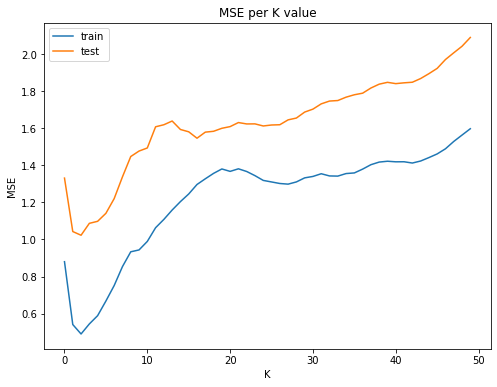

In [150]:
plt.figure(figsize=(8,6))
plt.plot(train_predictions, label = 'train')
plt.plot(test_predictions, label = 'test')
plt.xlabel("K")
plt.ylabel("MSE")
plt.title("MSE per K value")
plt.legend()
plt.show()

In [154]:
np.array(test_predictions).argmin() + 1 # Best k value

3

## Part G
Now, construct and fit a k-nearest neighbor model using the  KNeighborsRegressor() 
estimator in sklearn.neighbors module. Use the mean_square_error() function inside the 
sklearn.metrics module to compute the mse of the model on the test set. Is this similar to 
the mse value you got from the algorithm function you wrote from scratch? 

In [163]:
neigh = KNeighborsRegressor(3)
neigh.fit(X_delivery_train, y_delivery_train)
y_delivery_predictions = neigh.predict(X_delivery_test)
mean_squared_error(y_delivery_test, y_delivery_predictions)

1.0233113311331132

This model has a slightly better mse value, which makes sense because the model was optimized using the best k value as a parameter.

## Part H
Using the Pipeline constructor inside the sklearn.pipeline module, scale the 
X_delivery_train with the StandardScaler(), and also construct the 
KNeighborsRegressor() inside the Pipeline(). Then the call the fit() method on the 
pipeline object to fit the model into the delivery training data. Transform the 
X_delivery_test data using StandardScaler() and use the mean_squared_error () 
function inside the sklearn.metrics module to compute the mse of the model on the test 
set. Is this mse similar to the mse you got when you used the unscaled input data in (g) 
above?

In [312]:
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

pipe.fit(X_delivery_train, y_delivery_train)

scaler = StandardScaler()
scaler.fit(X_delivery_test)
X_delivery_test_scaled = scaler.transform(X_delivery_test)

y_delivery_test_scaled_predictions = pipe.predict(X_delivery_test)
mean_squared_error(y_delivery_test_scaled_predictions, y_delivery_test)

0.9748356435643569

Using the scaled data, the results seem slightly better with a lower mse.

## Part I
Use the scaled X_delivery_train and X_delivery_test data and the 
RandomForestRegressor constructor inside the sklearn.ensemble module to construct/fit a 
random forest model, the compute the mse for this model. Is this mse similar to the one 
you got in question (h) above? 

In [315]:
scaler = StandardScaler()
scaler.fit(X_delivery_test)
X_delivery_test_scaled = scaler.transform(X_delivery_test)
X_delivery_train_scaled = scaler.transform(X_delivery_train)

rf = RandomForestRegressor()
rf.fit(X_delivery_train_scaled, y_delivery_train)
y_delivery_predictions_rf = rf.predict(X_delivery_test_scaled)
mean_squared_error(y_delivery_predictions_rf, y_delivery_test)

0.9508777466109432

The results are similar to that of part H, but the Random Forest model mse is slightly better.

# Question 2
## Part A
You would use the student data for classification: that is, GPA and Age would be used as 
input to predict wither a student will drop out of school (Dropped=1) or not drop 
(Dropped=0). You will write a k-nearest neighbor algorithm function that learns from the 
training set and classifies given test instances to class 0 or class 1. The input that the 
function takes include:
* X_train: Pandas DataFrame or 2D NumPy array 
* y_train: Pandas Series or 1D NumPy array 
* X_test: Pandas DataFrame or 2D NumPy array
* K: the number of nearest neighbors. The default value should be k=5 if no k value 
is passed during function call. 

Scale the X_student_train and X_student_test data, and pass these scaled data sets in 
addition to y_student_train data into the knn_predict() function call to compute the 
predicted output values for the X_student_test set. You can reference the results using a 
variable, y_student_test_pred. 

In [224]:
def knn_predict(X_train, y_train, X_test, k=5):
    y_pred = []
    for i in range(0, len(X_test)):
        test_instance = np.array([X_test.iloc[i]])
        distances = []
        for j in range(0, len(X_train)):
            train_instance = np.array([X_train.iloc[j]])
            distances.append(np.linalg.norm(test_instance - train_instance))
        smallest_indices = np.array(distances).argsort()[:k]
        y_pred.append(random.choice(multimode(y_train.loc[smallest_indices].Dropped)))
    return y_pred

In [230]:
scaler = StandardScaler()
scaler.fit(X_student_test)
X_student_test_scaled = scaler.transform(X_student_test)
X_student_train_scaled = scaler.transform(X_student_train)

y_student_test_pred = knn_predict(pd.DataFrame(X_student_train_scaled),
                                          y_student_train, pd.DataFrame(X_student_test_scaled))

In [232]:
y_student_test_pred

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0]

## Part B
Define a function called overall_accuracy, that computes the overall accuracy of your 
algorithm. You can let your function compare the actual values (y) and the predicted or 
classified y values (y_pred), for example: overall accuracy could be computed using 
mean(y==y_pred)

In [241]:
def overall_accuracy(actual, predictions):
    
    return np.mean(actual == predictions)

overall_accuracy(y_student_test.Dropped, np.array(y_student_test_pred))

0.69

## Part C
Use GridSearch in scikit learn to tune the parameter of the k-nearest neighbor 
classifier, then use that optimal parameter to compute the accuracy of the knn estimator 
on the test set. Is this accuracy score similar to that obtained using your knn algorithm 
from scratch?

In [316]:
parameters = {'n_neighbors': [i for i in range(1,51)]}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters, scoring = 'accuracy')
clf.fit(X_student_train_scaled, y_student_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [265]:
clf.best_estimator_

KNeighborsClassifier(n_neighbors=18)

In [266]:
y_student_test_pred = y_student_test_pred = knn_predict(pd.DataFrame(X_student_train_scaled),
                                          y_student_train, pd.DataFrame(X_student_test_scaled), k=18)
overall_accuracy(y_student_test.Dropped, np.array(y_student_test_pred))

0.72

These results are slightly better than the ones using the model created from scratch. This makes sense because the newer model is using the optimal parameter of n_neighbors, compared to the other model which uses default values.

## Part D
Also build another model using a random forest classifier and compute the accuracy 
score on the test set. Which of these models is the better, the model is question 2c or this 
model in question 2d? Why or why not?

In [317]:
rf = RandomForestClassifier()
rf.fit(X_student_train_scaled, y_student_train)
y_student_test_pred = rf.predict(X_student_test_scaled)
overall_accuracy(y_student_test.Dropped, np.array(y_student_test_pred))

0.62

This random forest classifier does not perform as well as the KNN model in part c. This could be because the close proximity of the data is better understood using the KNN model.

# Question 3
Find your own dataset suitable for classification or regression with at least three input variables 
and 200 or more cases: Depending on the target variable of interest, you would build a k-nearest 
neighbor classifier or regressor using the appropriate sklearn estimator. Find some interesting 
unique dataset that is not popularly used in the internet. 
Address the following and include code/output snippets from b) to f). Include the response under 
each sub question. 
* a) State your research question 
* b) Data pre-processing (to the extent deemed necessary: remember the knn algorithm 
depends on distances, so you need to rescale, normalize or standardize your input values 
to make sure no variable influences the predictions due to it scale). 
* c) Data splitting 
* d) Model construction 
* e) Hyperparameter turning (choose whatever approach your like)
* f) Use the best or optimal parameter values to build a model, then compute the accuracy 
score for your estimator. 


Discuss about overfitting for the model 

## Part A

The purpose of this is to create a model that predicts if a leaf is classified as 'complex' or 'simple' based off of 15 input variables. This question arrises from the leaf dataset gathered from: https://archive.ics.uci.edu/ml/datasets/Leaf.

## Part B

In [288]:
columns = ['species', 'specimen_number', 'eccentricity', 'aspect_ratio', 'elongation', 
        'solidity', 'stochastic_convexity', 'isoperimetric_factor', 'maximal_indentation_depth', 'lobedness',
        'average_intensity', 'average_contrast', 'smoothness',  'third moment', 'uniformity', 'entropy']
leaf = pd.read_csv('leaf.csv', names = columns)
leaf = leaf.drop(['specimen_number'], axis = 1)

leaf['species'] = np.where((leaf['species'] <= 15), 0, leaf['species']) # Simple leafs
leaf['species'] = np.where((leaf['species'] > 15), 1, leaf['species']) # Complex

X = leaf.drop(['species'], axis = 1)
y = leaf['species']
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## Part C

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

## Part D

In [292]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

KNeighborsClassifier()

## Part E

In [295]:
train_predictions = []
test_predictions = []

for i in [_ for _ in range(1, 51)]:
    print(i, end = '\r')
    neigh = KNeighborsClassifier(i)
    neigh.fit(X_train, y_train)
    
    y_test_predictions = neigh.predict(X_test)
    y_train_predictions = neigh.predict(X_train)
    
    accuracy_test = overall_accuracy(y_test, y_test_predictions)
    accuracy_train = overall_accuracy(y_train, y_train_predictions)
    
    train_predictions.append(accuracy_train)
    test_predictions.append(accuracy_test)

## Part F

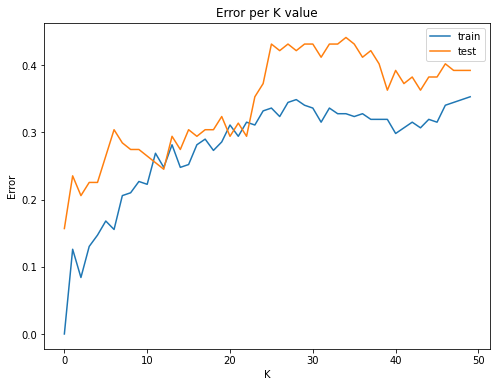

In [305]:
error_train = [1 - i for i in train_predictions]
error_test = [1 - i for i in test_predictions]

plt.figure(figsize=(8,6))
plt.plot(error_train, label = 'train')
plt.plot(error_test, label = 'test')
plt.xlabel("K")
plt.ylabel("Error")
plt.title("Error per K value")
plt.legend()
plt.show()

In [306]:
np.array(error_test).argmin() + 1 # Best k value

1

In [307]:
neigh = KNeighborsClassifier(1)
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
overall_accuracy(pred, y_test)

0.8431372549019608

It appears that this model slightly overfits, since the error rate of the training data is significantly better than that of the test data.